# Modelos de Regresión. End to End
## Predecir la calidad del vino
## data/winequality-red


In [48]:
# Decision Tree, Bagging, Pasting, RandomForest, ExtraTrees y AdaBoost
import pandas as pd
vinos = pd.read_csv("data/winequality-red.csv")

In [49]:
len(vinos)

1599

In [50]:
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [53]:
vinos["quality"].value_counts(normalize=True)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vinos.drop(columns=["quality"]), vinos["quality"], test_size=0.2, random_state=1743)


In [55]:
y_train.value_counts(normalize=True)

quality
5    0.437842
6    0.395622
7    0.117279
4    0.032056
8    0.010164
3    0.007037
Name: proportion, dtype: float64

In [56]:
y_test.value_counts(normalize=True)

quality
6    0.412500
5    0.378125
7    0.153125
4    0.037500
8    0.015625
3    0.003125
Name: proportion, dtype: float64

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
X = vinos.drop(columns=["quality"])
y = vinos["quality"]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1743)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [58]:
train_y_set.value_counts(normalize=True)

quality
5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: proportion, dtype: float64

In [59]:
test_y_set.value_counts(normalize=True)

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: proportion, dtype: float64

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=800)

In [61]:
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, random_state=800)

In [62]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

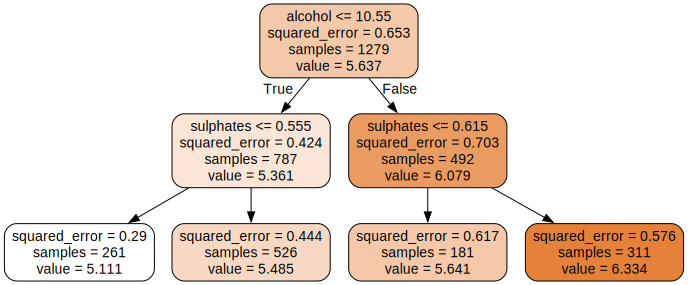

In [63]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [64]:
tree_reg.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [65]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 800,
 'splitter': 'best'}

In [68]:
tree_reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33691249,
       0.66308751])

In [70]:
tree_reg.feature_names_in_[tree_reg.feature_importances_>0]

array(['sulphates', 'alcohol'], dtype=object)

In [75]:
pd.DataFrame(tree_reg.predict(test_set))[0].unique()

array([5.48479087, 5.11111111, 6.33440514, 5.64088398])

In [76]:
((tree_reg.predict(train_set)-train_y_set)**2).mean()

0.4691441972551055

In [77]:
((tree_reg.predict(test_set)-test_y_set)**2).mean()

0.5542531914391565

In [79]:
((train_y_set.mean()-test_y_set)**2).mean()

0.6453090375225954

In [88]:
from sklearn.tree import DecisionTreeRegressor
for d in range(1,21):
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_leaf=20, random_state=800)
    tree_reg.fit(train_set,train_y_set)
    print(d)
    print("Train",((tree_reg.predict(train_set)-train_y_set)**2).mean())
    print("Test",((tree_reg.predict(test_set)-test_y_set)**2).mean())
    print("*"*100)

1
Train 0.5312143463938362
Test 0.5605489151199569
****************************************************************************************************
2
Train 0.4691441972551055
Test 0.5542531914391565
****************************************************************************************************
3
Train 0.42325274363114185
Test 0.5225263094066886
****************************************************************************************************
4
Train 0.3884420083931524
Test 0.5356715537377699
****************************************************************************************************
5
Train 0.3512410322658542
Test 0.5257746014567471
****************************************************************************************************
6
Train 0.3249223593120046
Test 0.5190837875301286
****************************************************************************************************
7
Train 0.3083706357318434
Test 0.5299566082137722
************************************

In [113]:
from sklearn.ensemble import RandomForestRegressor
rnd_frt = RandomForestRegressor(n_estimators=500, max_depth=3, min_samples_leaf=30, max_samples=600, random_state=42, oob_score=True)

In [114]:
rnd_frt.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=3, max_samples=600, min_samples_leaf=30,
                      n_estimators=500, oob_score=True, random_state=42)

In [115]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
306,7.6,0.620,0.32,2.2,0.082,7.0,54.0,0.99660,3.36,0.52,9.4
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4
1084,7.2,0.380,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5
1497,6.9,0.740,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0
...,...,...,...,...,...,...,...,...,...,...,...
298,7.2,0.650,0.02,2.3,0.094,5.0,31.0,0.99930,3.67,0.80,9.7
1188,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9
739,9.0,0.690,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0


In [116]:
rnd_frt.estimators_[0]

DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=30,
                      random_state=1608637542)

In [117]:
pd.DataFrame(rnd_frt.estimators_samples_[0]).value_counts()

0   
988     4
512     4
1247    4
135     4
634     3
       ..
444     1
440     1
436     1
430     1
1278    1
Name: count, Length: 477, dtype: int64

In [118]:
rnd_frt.oob_score_

0.36201445614280947

In [119]:
((train_y_set-rnd_frt.predict(train_set))**2).mean()

0.3893671912848411

In [121]:
from sklearn.ensemble import RandomForestRegressor
rnd_frt_2 = RandomForestRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_samples=1279, random_state=42, oob_score=True)

In [122]:
rnd_frt_2.fit(train_set, train_y_set)

RandomForestRegressor(max_depth=6, max_samples=1279, min_samples_leaf=30,
                      n_estimators=5000, oob_score=True, random_state=42)

In [123]:
((train_y_set-rnd_frt_2.predict(train_set))**2).mean()

0.334848597954787

In [129]:
rnd_frt_2.oob_score_

0.4014471969893688

In [127]:
((test_y_set-rnd_frt_2.predict(test_set))**2).mean()

0.4299760386547028

In [131]:
rnd_frt_2.feature_importances_

array([0.01526572, 0.11791018, 0.00980352, 0.0049537 , 0.01752139,
       0.01125028, 0.06071209, 0.01627262, 0.02146742, 0.21792867,
       0.50691442])

In [137]:
importances = pd.DataFrame(rnd_frt_2.feature_importances_).T
importances.columns = train_set.columns

In [138]:
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.015266,0.11791,0.009804,0.004954,0.017521,0.01125,0.060712,0.016273,0.021467,0.217929,0.506914


In [139]:
vinos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [142]:
from sklearn.ensemble import ExtraTreesRegressor
ext_frt = ExtraTreesRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_samples=1279, random_state=42, oob_score=True, bootstrap=True)
ext_frt.fit(train_set, train_y_set)

ExtraTreesRegressor(bootstrap=True, max_depth=6, max_samples=1279,
                    min_samples_leaf=30, n_estimators=5000, oob_score=True,
                    random_state=42)

In [149]:
ext_frt.oob_score_

0.35332914932396275

In [150]:
((train_y_set-ext_frt.predict(train_set))**2).mean()

0.40390453980935254

In [151]:
((test_y_set-ext_frt.predict(test_set))**2).mean()

0.4419811295513645

In [152]:
importances = pd.DataFrame(ext_frt.feature_importances_).T
importances.columns = train_set.columns

In [153]:
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.018518,0.174174,0.050546,0.002314,0.004898,0.009366,0.051839,0.028703,0.011894,0.137253,0.510495


In [168]:
from sklearn.ensemble import ExtraTreesRegressor
ext_frt_2 = ExtraTreesRegressor(n_estimators=5000, max_depth=6, min_samples_leaf=30, max_features=6, random_state=42, oob_score=True, bootstrap=True)
ext_frt_2.fit(train_set, train_y_set)

ExtraTreesRegressor(bootstrap=True, max_depth=6, max_features=6,
                    min_samples_leaf=30, n_estimators=5000, oob_score=True,
                    random_state=42)

In [175]:
importances = pd.DataFrame(ext_frt_2.feature_importances_).T
importances.columns = train_set.columns
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.026539,0.183175,0.076666,0.003578,0.008413,0.011273,0.068277,0.047406,0.012477,0.134064,0.428133


In [170]:
ext_frt_2.oob_score_

0.3116780878972272

In [171]:
((train_y_set-ext_frt_2.predict(train_set))**2).mean()

0.436703788216178

In [172]:
((test_y_set-ext_frt_2.predict(test_set))**2).mean()

0.46686801161773134

In [202]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2, min_samples_leaf=30),n_estimators=5000,  random_state=42, learning_rate=0.05)
ada.fit(train_set, train_y_set)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2,
                                                  min_samples_leaf=30),
                  learning_rate=0.05, n_estimators=5000, random_state=42)

In [203]:
((train_y_set-ada.predict(train_set))**2).mean()

0.4090772811224121

In [204]:
((test_y_set-ada.predict(test_set))**2).mean()

0.4634437107324569

In [205]:
importances = pd.DataFrame(ada.feature_importances_).T
importances.columns = train_set.columns

In [206]:
importances

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.008571,0.246723,0.000722,0.004403,0.089705,0.003272,0.00798,0.011799,0.011999,0.268061,0.346765
